# Week 14 Bagging, Random Forest, and Boosting
 - load Boston.csv (house price data)
 - tree regression
 - bagging
 - random forest
 - boosting

In [1]:
import numpy as np
import pandas as pd

In [2]:
boston_df = pd.read_csv('Boston.csv')
boston_df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [4]:
X = boston_df.drop('medv', axis=1)
y = boston_df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

## One decision tree regression

In [5]:
regr2 = DecisionTreeRegressor(max_depth=3)
regr2.fit(X_train, y_train)
pred = regr2.predict(X_test)

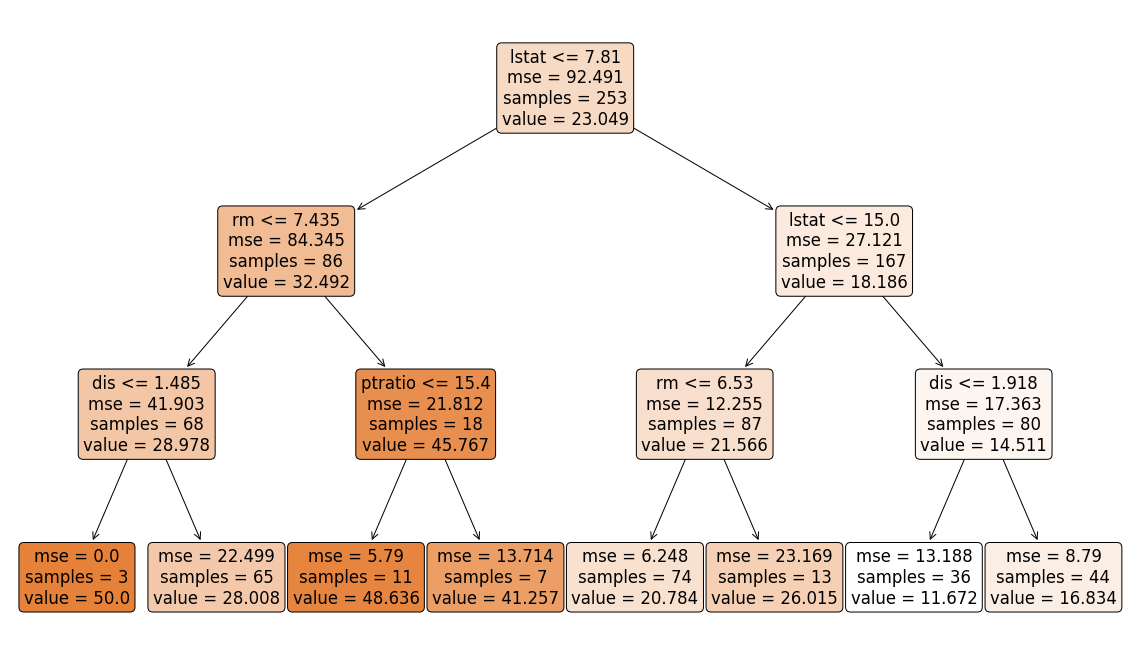

In [6]:
from sklearn.tree._export import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 12))
plot_tree(regr2, feature_names = X.columns, rounded = True, filled=True)
plt.show()

### Plot y_test versus y_pred

Text(0, 0.5, 'y_test')

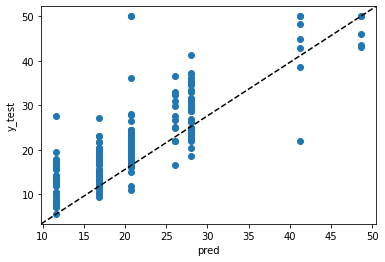

In [7]:
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [8]:
mean_squared_error(y_test, pred)

26.02323085009744

## Bagging: Many decision trees trained on many boostrapped data sets

In [9]:
# There are 13 features in the dataset
X.shape

(506, 13)

In [10]:
# Bagging: using all features
regr1 = RandomForestRegressor(max_features=13, random_state=1)
regr1.fit(X_train, y_train)

RandomForestRegressor(max_features=13, random_state=1)

Text(0, 0.5, 'y_test')

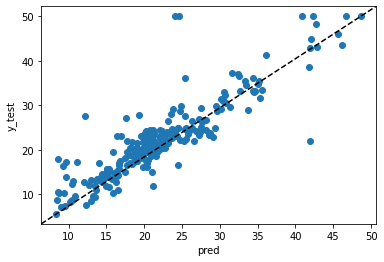

In [11]:
pred = regr1.predict(X_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [12]:
mean_squared_error(y_test, pred)

16.17512869960475

## Random Forest: Many trees are trained using different random features

In [13]:
# Random forests: using 6 features
regr2 = RandomForestRegressor(max_features=6, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(max_features=6, random_state=1)

In [14]:
pred = regr2.predict(X_test)
mean_squared_error(y_test, pred)

15.82350045849802

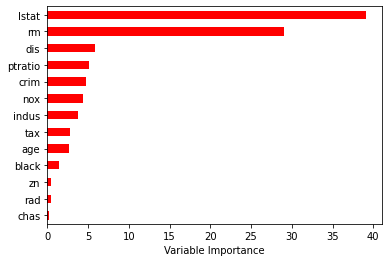

In [15]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## Boosting: sequence of trees, each tree is trained using the residue error from previous

In [16]:
regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=1)

zn          0.013059
chas        0.121257
rad         0.153199
black       0.460309
indus       0.576559
nox         0.731767
age         0.922677
tax         1.098078
crim        2.799589
ptratio     4.370389
dis         5.896297
rm         27.934202
lstat      54.922618
dtype: float64


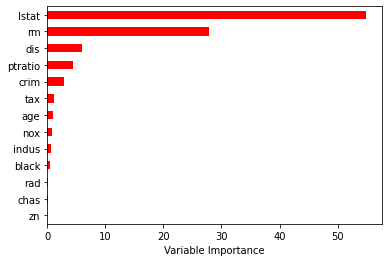

In [17]:
feature_importance = regr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [18]:
mean_squared_error(y_test, regr.predict(X_test))

15.592155779633027

## Conclusions on the 4 models applied to Boston.csv 
 - test error: Gradient boosting < Random Forest < Bagging < Single decision tree
 - We can see what is the most important features in Random forest and Gradient Boosting 

## Exercise Application to high-dimensional data set Caravan.csv

In [19]:
caravan_df = pd.read_csv('Caravan.csv')
caravan_df.head()

Unnamed: 0  MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  \
0           1       33         1        3         2         8       0       5   
1           2       37         1        2         2         8       1       4   
2           3       37         1        2         2         8       0       4   
3           4        9         1        3         3         3       2       3   
4           5       40         1        4         2        10       1       4   

   MGODOV  MGODGE  ...  APERSONG  AGEZONG  AWAOREG  ABRAND  AZEILPL  APLEZIER  \
0       1       3  ...         0        0        0       1        0         0   
1       1       4  ...         0        0        0       1        0         0   
2       2       4  ...         0        0        0       1        0         0   
3       2       4  ...         0        0        0       1        0         0   
4       1       4  ...         0        0        0       1        0         0   

   AFIETS  AINBOED  ABYSTAND  Purchase  
0       0        0         0        No  
1       0        0         0        No  
2       0        0         0        No  
3       0        0         0        No  
4       0        0         0        No  

[5 rows x 87 columns]

### Single Decision Tree

In [159]:
caravan_df["Purchase"] = caravan_df["Purchase"].factorize()[0]
X = caravan_df.drop('MOSTYPE', axis=1)
y = caravan_df.MOSTYPE.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [184]:
model1 = DecisionTreeRegressor(max_depth=4)
model1.fit(X_train, y_train)
pred = model1.predict(X_test)

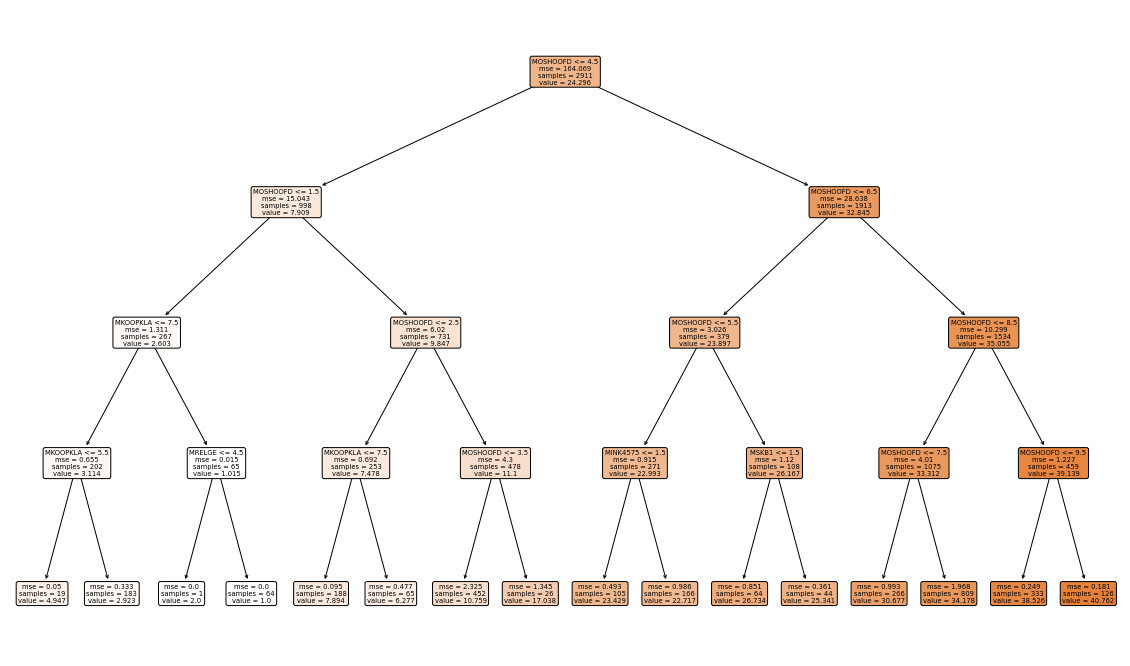

In [185]:
fig, ax = plt.subplots(figsize=(20, 12))
plot_tree(model1, feature_names = X.columns, rounded = True, filled=True)
plt.show()

Text(0, 0.5, 'y_test')

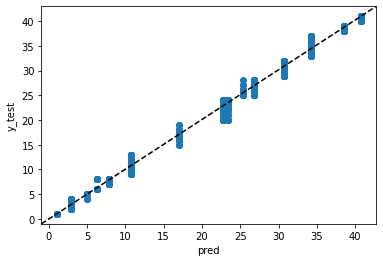

In [186]:
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [163]:
mean_squared_error(y_test, pred)

2.583683123030535

### Random Forest

In [164]:
# Random forests: using 6 features
model2 = RandomForestRegressor(max_features=6, random_state=1)
model2.fit(X_train, y_train)

RandomForestRegressor(max_features=6, random_state=1)

In [165]:
pred = model2.predict(X_test)
mean_squared_error(y_test, pred)

8.081589969082788

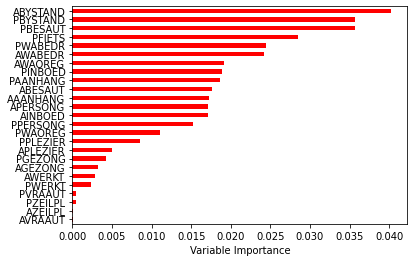

In [166]:
#here I am limiting the number of variables displayed to 25 anything after that it is not significant
Importance = pd.DataFrame({'Importance':model2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True)[0:25].plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### Boosting

In [167]:
model3 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
model3.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=1)

Unnamed: 0     0.000000
MAANTHUI       0.000000
MGEMOMV        0.000000
MRELSA         0.000000
MGODOV         0.000047
MFALLEEN       0.000048
MGODGE         0.000050
MOPLHOOG       0.000050
MRELOV         0.000061
MBERARBO       0.000064
MFGEKIND       0.000126
MSKA           0.000217
MRELGE         0.000232
MGODPR         0.000369
MGEMLEEF       0.001015
MGODRK         0.001510
MOPLLAAG       0.002230
MBERMIDD       0.002639
MBERZELF       0.002825
MBERBOER       0.002953
MOPLMIDD       0.003196
MFWEKIND       0.004458
MBERHOOG       0.005095
MBERARBG       0.007185
MOSHOOFD      99.380362
dtype: float64


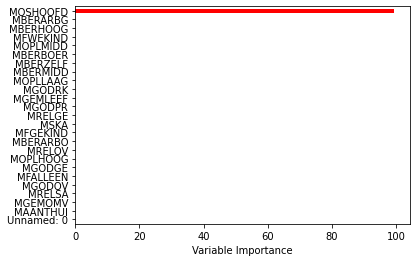

In [168]:
#here I am limiting the number of variables displayed to 25 anything after that it is not significant
feature_importance = model3.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns)[0:25].sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [169]:
mean_squared_error(y_test, model3.predict(X_test))

0.6668643527879702

### Ada Boosting

In [191]:
from sklearn.ensemble import AdaBoostRegressor

In [192]:
rng = np.random.RandomState(1)

model4 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=500, random_state=rng)

In [193]:
model4.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=500,
                  random_state=RandomState(MT19937) at 0x7FC1BE48FC40)

In [194]:
y_2 = model4.predict(X_test)

In [195]:
mean_squared_error(y_test,y_2)

0.9554601665558783

Boosting < Ada Boosting < Single Decision Tree < Random Forest 

I kept the max_depth size to be 4

Notes
The parameters for the number of trees is n_estimators.

From the sklearn documentation
The number of weak learners (i.e. regression trees) is controlled by the parameter n_estimators; The size of each tree can be controlled either by setting the tree depth via max_depth or by setting the number of leaf nodes via max_leaf_nodes. The learning_rate is a hyper-parameter in the range (0.0, 1.0] that controls overfitting via shrinkage .
The parameter learning_rate strongly interacts with the parameter n_estimators, the number of weak learners to fit. Smaller values of learning_rate require larger numbers of weak learners to maintain a constant training error. 